# EDA - Suicide Data 
##### Elizabeth Dombowsky 

### Exploratory Data Analysis on suicide by country from the years 1985 to 2016

#### Process: First, handle intial formatting of columns and names in the data frame. Then, handle missing values and outliers. Next, look at a summary of the statistics and overall overview of the dataset. Next, look features in the data through visualizations. Next, determine any correlations through plots and correlation coefficients. Finally, use reduction dimensionality with random forests. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set() 

df = pd.read_csv('/Users/elizabethdombowsky/Desktop/MSDS 650 Analytics/week 3/master.csv')

In [2]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,0.675,"63,067,077,179",2309,Boomers


Notes: Generation X had a large boom of suicide numbers from 2010 to 2015, however, the largest most consistenly has been Boomers. Milleneal suicide rates have continued to climb. It is clear by both the graph above and this one that the data for 2016 is either incomplete, in-progress, or incorrect. 

### Initial Cleaning 

Deleting "country-year" column: After looking at the dataset, having "country-year" is not helpful because there are two other columns with country and year. 

In [4]:
#Drop country-year
df.drop(axis = 0, columns = "country-year", inplace = True)

In [5]:
#look at df after dropping for formatting
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z


Rename a few columns for readability

In [6]:
#rename columns
df = df.rename(columns={'suicides_no': 'total_suicides', 'gdp_for_year($)': 'gdp_for_year','gdp_per_capita ($)':'gdp_per_capita'})

In [7]:
df

,country,year,sex,age,total_suicides,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,0.675,"63,067,077,179",2309,Generation Z


### Statistics Summary

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,27820.0,2.001258e+03,8.469055e+00,1985.000,1995.000,2002.000,2008.000,2.016000e+03
total_suicides,27820.0,2.425744e+02,9.020479e+02,0.000,3.000,25.000,131.000,2.233800e+04
population,27820.0,1.844794e+06,3.911779e+06,278.000,97498.500,430150.000,1486143.250,4.380521e+07
suicides/100k pop,27820.0,1.281610e+01,1.896151e+01,0.000,0.920,5.990,16.620,2.249700e+02
HDI for year,8364.0,7.766011e-01,9.336671e-02,0.483,0.713,0.779,0.855,9.440000e-01
gdp_per_capita,27820.0,1.686646e+04,1.888758e+04,251.000,3447.000,9372.000,24874.000,1.263520e+05


### Handle Missing Data

In [9]:
df[df.isnull().values.any(axis = 1)]

,country,year,sex,age,total_suicides,population,suicides/100k pop,HDI for year,gdp_for_year ($),gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...
27755,Uzbekistan,2009,female,75+ years,7,318983,2.19,NaN,"33,689,223,673",1332,Silent
27756,Uzbekistan,2009,female,35-54 years,65,3263931,1.99,NaN,"33,689,223,673",1332,Boomers
27757,Uzbekistan,2009,female,55-74 years,15,1105076,1.36,NaN,"33,689,223,673",1332,Silent
27758,Uzbekistan,2009,male,5-14 years,37,2805898,1.32,NaN,"33,689,223,673",1332,Generation Z


Most of the missing values come from the "HDI for year" column. This column will likely be deleted if it is missing a significant amount of data. It is also undetermined what HDI for year represents

In [10]:
df['HDI for year'].isnull().sum()

19456

HDI for year column has zero values filled. Will delete this column as it will not provide beneficial data for analysis. 

In [11]:
#Delete HDI for year
#df = df["HDI for year"].drop
df.drop(axis = 0, columns = "HDI for year", inplace = True)

In [12]:
#confirm drop and check formatting
df

,country,year,sex,age,total_suicides,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [13]:
#total missing values by row
df.isna().sum()

country               0
year                  0
sex                   0
age                   0
total_suicides        0
population            0
suicides/100k pop     0
 gdp_for_year ($)     0
gdp_per_capita        0
generation            0
dtype: int64

There are no other missing values to handle

### Assess and Handle Outliers

<AxesSubplot:>

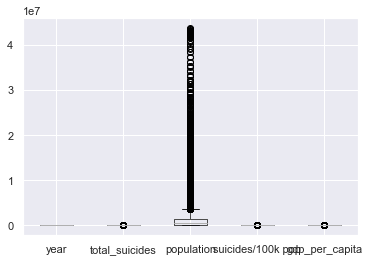

In [14]:
df.boxplot()

There are a lot of outliers in population, this needs to be looked at more closely

<AxesSubplot:>

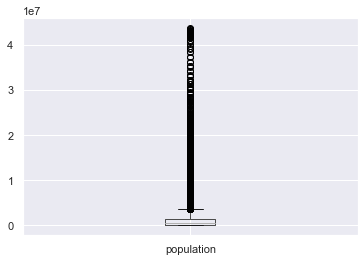

In [15]:
#look at outliers in population column
df.boxplot(column= 'population')

There are a lot of outliers in population. The first instinct is to delete them. However, since these are population figures, they need to be looked at individually. The countries could vary greatly or there could be incorrect numbers. Will loook at the largest and smallest numbers in accordance with their country to look more closely at the values

#### Sort population values by greatest to least

In [16]:
df.sort_values(by = ['population'], ascending = False)[:10]

,country,year,sex,age,total_suicides,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita,generation
27105,United States,2006,female,35-54 years,3376,43805214,7.71,"13,855,888,000,000",49666,Boomers
27117,United States,2007,female,35-54 years,3525,43607902,8.08,"14,477,635,000,000",51585,Boomers
27093,United States,2005,female,35-54 years,3209,43509335,7.38,"13,093,726,000,000",47423,Boomers
27081,United States,2004,female,35-54 years,3399,43240905,7.86,"12,274,928,000,000",44867,Boomers
27101,United States,2006,male,35-54 years,10641,43139910,24.67,"13,855,888,000,000",49666,Boomers
27125,United States,2008,male,35-54 years,11371,43002471,26.44,"14,718,582,000,000",52128,Boomers
27069,United States,2003,female,35-54 years,3058,42997878,7.11,"11,510,670,000,000",42468,Boomers
27113,United States,2007,male,35-54 years,10978,42992076,25.53,"14,477,635,000,000",51585,Boomers
27057,United States,2002,female,35-54 years,3058,42957716,7.12,"10,977,514,000,000",40845,Boomers
27137,United States,2009,male,35-54 years,11613,42932194,27.05,"14,418,739,000,000",50563,Boomers


These numbers are not radically over the population. They are not user error and therefore should not be deleted as of now. Next, look at the population from least to greatest to look at their population reported numbers to assess the validatiy of the input

#### Sort population values by least to greatest

In [17]:
df.sort_values(by = ['population'], ascending = True)[:10]

,country,year,sex,age,total_suicides,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita,generation
14167,Kiribati,2000,male,75+ years,0,278,0.0,"67,254,174",928,G.I. Generation
14059,Kiribati,1991,male,75+ years,0,278,0.0,"47,515,189",768,G.I. Generation
14071,Kiribati,1992,male,75+ years,0,286,0.0,"47,737,955",759,G.I. Generation
14107,Kiribati,1995,male,75+ years,0,287,0.0,"56,338,028",855,G.I. Generation
14083,Kiribati,1993,male,75+ years,0,290,0.0,"46,919,625",735,G.I. Generation
14095,Kiribati,1994,male,75+ years,0,291,0.0,"54,832,578",845,G.I. Generation
14155,Kiribati,1999,male,75+ years,0,293,0.0,"69,032,258",973,G.I. Generation
14179,Kiribati,2001,male,75+ years,0,294,0.0,"63,101,272",854,Silent
14119,Kiribati,1996,male,75+ years,0,297,0.0,"66,515,377",991,G.I. Generation
14131,Kiribati,1997,male,75+ years,0,302,0.0,"67,537,480",988,G.I. Generation


According to Google, the country of kiribati does have very few people in it's population. Having 278 of one generation, is reasonable. Because the data does not appear to be user error, a mistake, and is relevent, these need to stay; the population outliers will not be deleted.

#### Look at bloxplots from other columns

<AxesSubplot:>

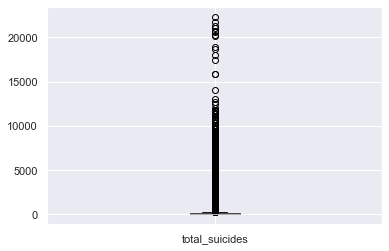

In [18]:
#df.boxplot(columns = ["country year"],["sex"],["age"])
df.boxplot(['total_suicides' ])

<AxesSubplot:>

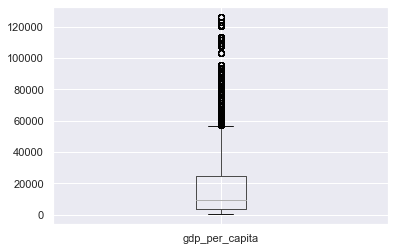

In [19]:
#boxplot GDP per capita
df.boxplot(['gdp_per_capita' ])

This makes sense after looking at the population data. Unless any of the numbers look like user error or incorrect, these will also stay.

#### Sort gdp per capita from greatest to least

In [20]:
df.sort_values(by = ['gdp_per_capita'], ascending = False)[:10]

,country,year,sex,age,total_suicides,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita,generation
15657,Luxembourg,2014,male,25-34 years,7,41442,16.89,"66,327,344,189",126352,Millenials
15654,Luxembourg,2014,male,55-74 years,18,52295,34.42,"66,327,344,189",126352,Boomers
15665,Luxembourg,2014,female,5-14 years,0,30054,0.00,"66,327,344,189",126352,Generation Z
15664,Luxembourg,2014,male,5-14 years,1,31718,3.15,"66,327,344,189",126352,Generation Z
15663,Luxembourg,2014,female,35-54 years,3,84147,3.57,"66,327,344,189",126352,Generation X
15662,Luxembourg,2014,female,25-34 years,2,40862,4.89,"66,327,344,189",126352,Millenials
15661,Luxembourg,2014,male,15-24 years,2,34219,5.84,"66,327,344,189",126352,Millenials
15660,Luxembourg,2014,female,15-24 years,2,32510,6.15,"66,327,344,189",126352,Millenials
15659,Luxembourg,2014,female,55-74 years,5,52260,9.57,"66,327,344,189",126352,Boomers
15658,Luxembourg,2014,female,75+ years,3,22669,13.23,"66,327,344,189",126352,Silent


According to Worldometer, Luxemobourg still has one of the largest GDP per capita's in the world, this is correct
#https://www.worldometers.info/gdp/gdp-per-capita/

#### Sort gdp per capita from least to greatest

In [21]:
df.sort_values(by = ['gdp_per_capita'], ascending = True)[:10]

,country,year,sex,age,total_suicides,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita,generation
41,Albania,1992,female,25-34 years,4,267400,1.50,"709,452,584",251,Boomers
39,Albania,1992,male,25-34 years,7,245500,2.85,"709,452,584",251,Boomers
40,Albania,1992,female,15-24 years,7,292400,2.39,"709,452,584",251,Generation X
36,Albania,1992,male,35-54 years,12,343800,3.49,"709,452,584",251,Boomers
38,Albania,1992,male,55-74 years,5,159500,3.13,"709,452,584",251,Silent
42,Albania,1992,female,35-54 years,2,323100,0.62,"709,452,584",251,Boomers
43,Albania,1992,female,55-74 years,1,164900,0.61,"709,452,584",251,Silent
44,Albania,1992,female,5-14 years,0,336700,0.00,"709,452,584",251,Millenials
37,Albania,1992,male,15-24 years,9,263700,3.41,"709,452,584",251,Generation X
46,Albania,1992,male,5-14 years,0,362900,0.00,"709,452,584",251,Millenials


According to Googlem, Albania has a very low GDP per capita, this data is correct and not user error. 
#https://www.google.com/search?q=countreis+with+lowest+gdp+per+capita+albania&sxsrf=ALiCzsZzzrNFotx6qeSYMvwBPcjM-ZbeCA%3A1658105859711&ei=A7DUYu30KpWjqtsP18KjwA8&ved=0ahUKEwitgpLWnYH5AhWVkWoFHVfhCPgQ4dUDCA4&uact=5&oq=countreis+with+lowest+gdp+per+capita+albania&gs_lcp=Cgdnd3Mtd2l6EAMyBwghEAoQoAE6BwgAEEcQsAM6BAgAEA06BggAEB4QDToGCAAQHhAWOgUIABCGA0oECEEYAEoECEYYAFCABVilC2CaDGgBcAB4AIABfogBgAeSAQMxLjeYAQCgAQHIAQjAAQE&sclient=gws-wiz

Almost every column has a signficant amout of outliers in the data. The population ranges from a few hundred to multi-millions. The total suicide rate fluctuates like this as well along with gdp per capita. I will not be taking out these outliers for one specific reason. The country population effects the suicide rate as well as the gdp per capita. This does not look like an error in sampling, rather than major population differences and the affects those have on the other features of the data. Deleting these would delete a large portion of countries and this EDA is not specifically targeting smaller populations and therefore, deleting them would not be representative of the population. For now, the outliers will stay unless something comes up further in the EDA. 

<AxesSubplot:xlabel='country', ylabel='population'>

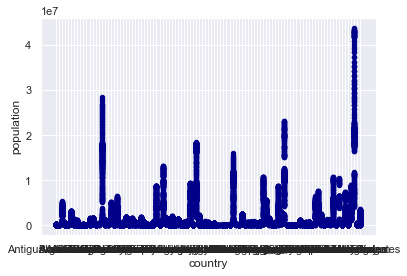

In [22]:
df.plot.scatter('country','population', c='darkblue')

### Checking for Duplicate Rows

In [23]:
df.duplicated().any()

False

There are no duplicate rows, this is helpful information for assessing the outliers as if there were, that might help explain why there are so many

### Continuous Vs. Categorical Variables

In [24]:
df.columns

Index(['country', 'year', 'sex', 'age', 'total_suicides', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita',
       'generation'],
      dtype='object')

Continuous Variables : year, country, age, suicides_no, population, country-year, suicides/100k pop, HDI for year, gdp_for_year ($), gdp_per_capita ($)
    
Categorical Variables: Sex, Generation 

### Make sex and generation type category

In [25]:

df.sex = df.sex.astype('category')
df.generation = df.generation.astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   country             27820 non-null  object  
 1   year                27820 non-null  int64   
 2   sex                 27820 non-null  category
 3   age                 27820 non-null  object  
 4   total_suicides      27820 non-null  int64   
 5   population          27820 non-null  int64   
 6   suicides/100k pop   27820 non-null  float64 
 7    gdp_for_year ($)   27820 non-null  object  
 8   gdp_per_capita      27820 non-null  int64   
 9   generation          27820 non-null  category
dtypes: category(2), float64(1), int64(4), object(3)
memory usage: 1.8+ MB


# Feature Visualization

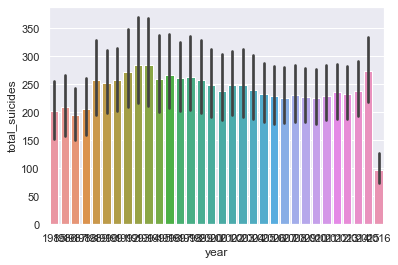

In [26]:
sns.barplot(data = df, x = 'year', y = 'total_suicides')
sns.set(rc = {'figure.figsize':(15,10)})

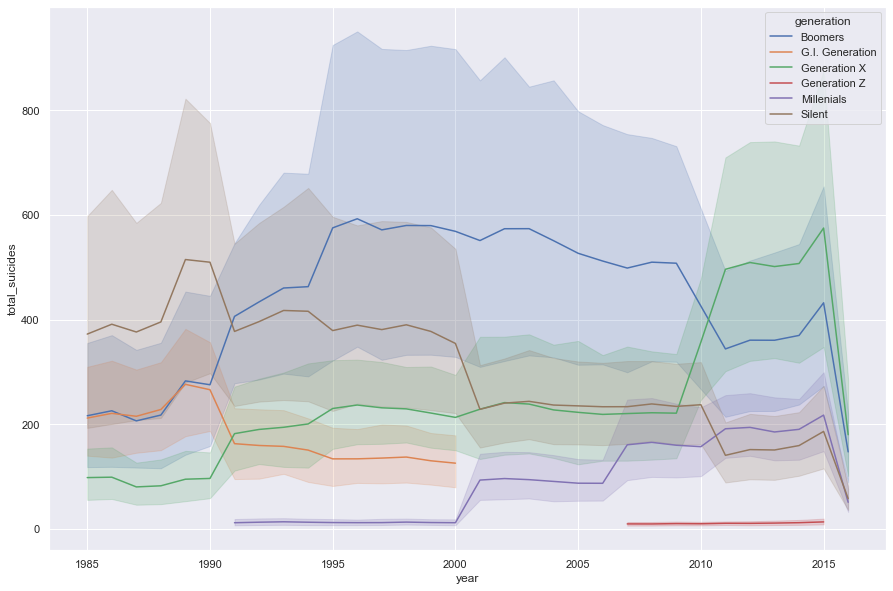

In [27]:
sns.lineplot(data = df, x = 'year', y = 'total_suicides', hue = "generation")
sns.set(rc = {'figure.figsize':(5,5)})

### Look at relationships 

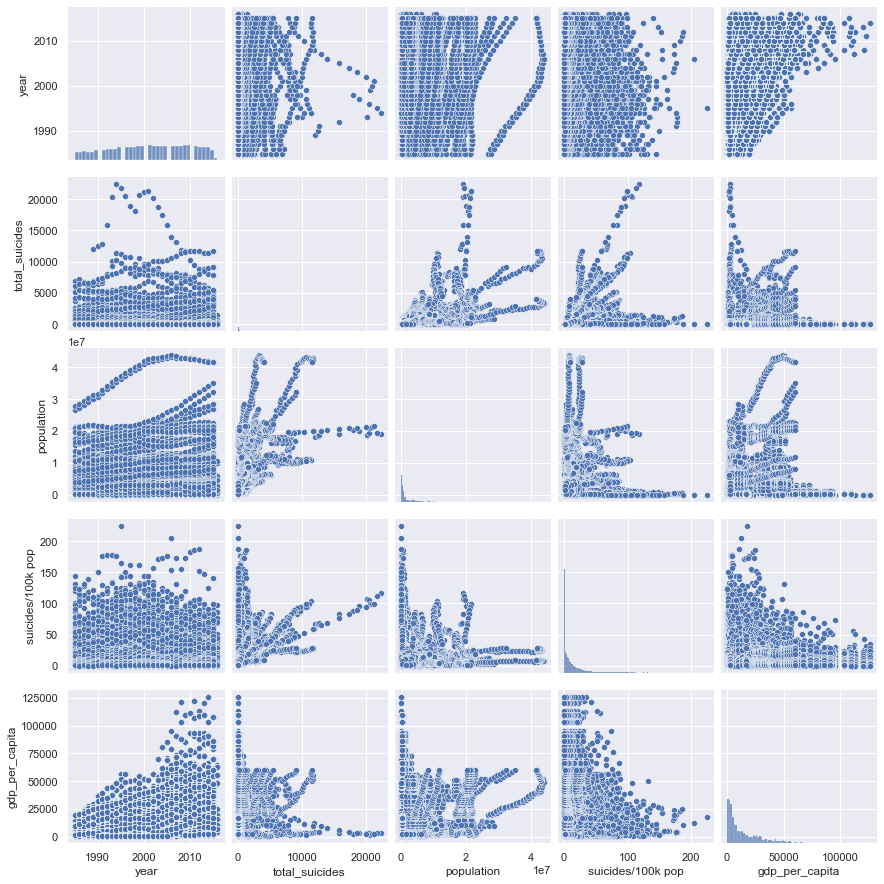

In [28]:
sns.pairplot(df)

There are no largely signficantly correlated relationships laid out on the graphs. Total suicides per 100k and sucidies does look close. Also, total sucidies and population looks slightly correalted but weak. There are no strong correlations after looking visually

In [29]:
#correlation matrix
corrmatrix = df.corr()
corrmatrix

,year,total_suicides,population,suicides/100k pop,gdp_per_capita
year,1.000000,-0.004546,0.008850,-0.039037,0.339134
total_suicides,-0.004546,1.000000,0.616162,0.306604,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.001785
gdp_per_capita,0.339134,0.061330,0.081510,0.001785,1.000000


Population and total_suicides have a correlation coefficient of .62 which tells that they are positively correalated. I will plot this below to look at it more closely. Total suicides and suicides per 100k population only has a .30 correlation which is not a correlation.

#### Plot suicides and population on a scatter plot

<AxesSubplot:xlabel='population', ylabel='total_suicides'>

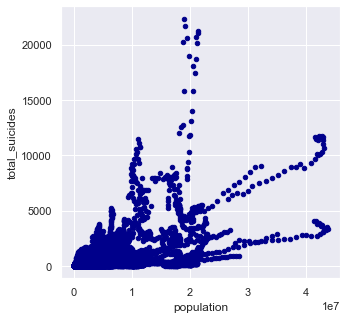

In [30]:
df.plot.scatter('population', 'total_suicides', c='darkblue')

The plot is interesting that even at medium sized populations there are larger amounts of suicides than at the largest number of countries. The largest countries tend to have as many suicides as many of the smaller countries. The relationship does not look traditionally correlated, however, it is clear by the graph there is a relationship

#### Heatmap Correlation

<AxesSubplot:>

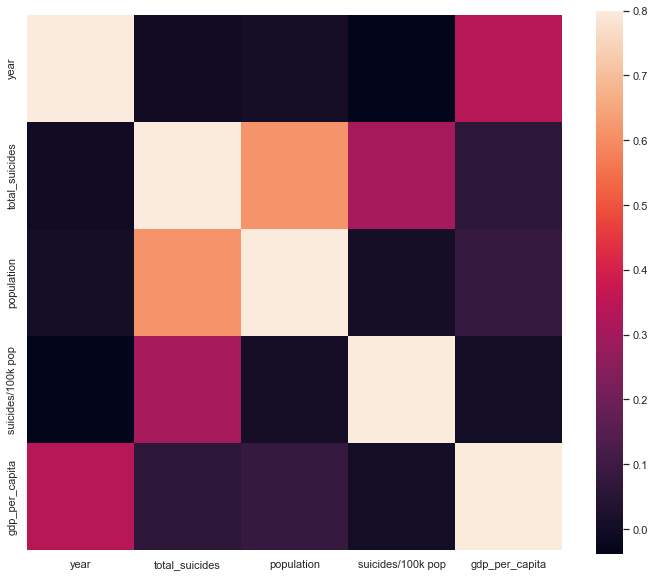

In [31]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(corrmatrix, vmax = .8, square=True)

population and total_suicides are the most highly correlated with year and gdp_per_capita and suicides per 100k population and total_suicides follow behind with a weak correlation. This is in line with the other correlation caluclations done above.

### Feature Selection - Reduction of Dimensonality |

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
dfcor = df.corr()

In [34]:
X = df[dfcor.columns[:-1]]
X.shape

(27820, 4)

In [35]:
y = df['total_suicides'].values
y.shape

(27820,)

In [36]:
model = RandomForestRegressor()
model.fit(X,y)
importance_list = list(zip(X.columns, model.feature_importances_))
sorted_importance = sorted(importance_list, key=lambda x: x[1], reverse=True)
sorted_importance

[('total_suicides', 0.9987297606030503),
 ('suicides/100k pop', 0.0010327202374793311),
 ('year', 0.0001517692762460425),
 ('population', 8.574988322442333e-05)]

In [37]:
max_feature_len = len(max(X.columns, key=len))
max_feature_len

17

In [38]:
for feature, rank in sorted_importance:
    dots = max_feature_len - len(feature)
    print(f'{feature}: {"."*dots} {rank*100:.2f}%')

total_suicides: ... 99.87%
suicides/100k pop:  0.10%
year: ............. 0.02%
population: ....... 0.01%


Random forest sees suicides/100k population to be the closest with total_suicides. This makes a lot of sense because theset two variables are separated by a specific calculation. It is suprising that year is above population. It seems that year and population are the two highest correlation (not including sucides per 100k population). This is in line with the other analyses done, however on the others, total_suicides and year had a -0.004546 correlation coefficient. 

The most important features are total_suicides, suicides/100k population, year, and population

# Insights 

- The largest total suicides by generation, by year from 1985 - 2016 was in 1997 by Boomers
- The highest number of suicides by year from 1985-2016 was in 1993, 1994, and 2015
- The most closely correlated variables are population and total suicides
- In reducing the dataset, total_suicides, suicides/100kpop, year, and population are the most important variables